In [19]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt


# SQL Alchemy
from sqlalchemy import create_engine

In [20]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [21]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn)
data.head()

,index,crypto,time,open,high,low,close,volume,trade
0,0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [22]:
data.to_csv("exported-data.csv")

In [23]:
data = data.drop(labels=["index"], axis=1)
data

,crypto,time,open,high,low,close,volume,trade
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700
...,...,...,...,...,...,...,...,...
6024,solana_usdt,1.637798e+09,205.76000000,216.35000000,201.93000000,209.97000000,1764837.19000000,886350.87000000
6025,solana_usdt,1.637885e+09,209.94000000,210.53000000,182.70000000,192.42000000,2776105.44000000,1241556.23000000
6026,solana_usdt,1.637971e+09,192.37000000,199.39000000,190.61000000,192.74000000,1028955.27000000,500367.73000000
6027,solana_usdt,1.638058e+09,192.74000000,202.10000000,180.93000000,200.69000000,1560980.85000000,789804.92000000


In [24]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)

In [25]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,ethereum_usdt,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,ethereum_usdt,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,ethereum_usdt,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [26]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,crypto,open,high,low,close,volume,trade
time,,,,,,,
2017-11-29,ethereum_usdt,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,ethereum_usdt,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,ethereum_usdt,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,ethereum_usdt,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,ethereum_usdt,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
2021-11-25,ethereum_usdt,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
2021-11-26,ethereum_usdt,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
2021-11-27,ethereum_usdt,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000


In [27]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000


In [28]:
ethereum_df.to_csv("Etherum_df.csv")

In [29]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [30]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [31]:
#take only the first 365 rows.
#ethereum_df = ethereum_df.iloc[:365]

In [32]:
X = ethereum_df.drop("close", axis=1)
X

,open,high,low,volume,trade
time,,,,,
2017-11-29,466.17,515.00,385.00,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,24490.05997,12239.10293
...,...,...,...,...,...
2021-11-25,4270.10,4550.00,4248.27,445868.24340,231824.31930
2021-11-26,4524.48,4551.00,3913.00,720245.16120,348872.86610
2021-11-27,4041.20,4183.66,4028.34,275326.52020,136157.34820


In [33]:
# Set y label

y = ethereum_df[["close"]]
y

,close
time,
2017-11-29,421.70
2017-11-30,427.43
2017-12-01,457.51
2017-12-02,457.63
2017-12-03,460.30
...,...
2021-11-25,4524.85
2021-11-26,4041.20
2021-11-27,4095.29


LR: 0.996457 (0.000625)
Lasso: 0.893547 (0.071087)
Ridge: 0.114476 (0.743009)
RF: 0.298782 (0.973700)
XGBOOST: 0.261323 (1.008291)
NN: 0.994704 (0.002270)
KNN: -8.056331 (7.945834)
SVR: -11.697607 (13.602726)


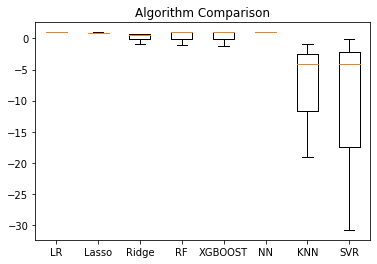

In [34]:
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [16]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-11-29 to 2018-11-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    365 non-null    float64
 1   high    365 non-null    float64
 2   low     365 non-null    float64
 3   close   365 non-null    float64
 4   volume  365 non-null    float64
 5   trade   365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [35]:
# now want to reset the train and test data to fit the model and test
train = ethereum_df.loc["2017-11": "2021-10"]
test = ethereum_df.loc["2021-11"]


In [36]:
train

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-10-27,4131.52,4307.00,3909.00,3922.00,704604.25000,342946.25220
2021-10-28,3921.99,4295.00,3890.17,4286.02,626378.50550,331721.67970
2021-10-29,4286.01,4460.47,4265.97,4418.89,559231.07691,299827.57771


In [37]:
test

,open,high,low,close,volume,trade
time,,,,,,
2021-11-01,4287.48,4386.58,4146.30,4319.43,417620.70730,208433.93650
2021-11-02,4319.43,4599.60,4284.43,4589.89,468184.79301,245450.71120
2021-11-03,4589.68,4665.87,4455.00,4603.35,448658.35125,221693.79026
2021-11-04,4603.35,4606.65,4420.08,4532.32,368218.25695,180789.48190
2021-11-05,4532.31,4570.05,4438.80,4474.24,305651.72440,152155.85650
2021-11-06,4474.24,4530.00,4326.17,4518.00,322154.09730,162175.62780
2021-11-07,4518.00,4637.98,4502.37,4612.59,243596.59520,124167.19250
2021-11-08,4612.59,4822.97,4612.00,4807.98,391102.31806,202324.49531
2021-11-09,4807.98,4838.28,4713.89,4732.33,311267.57998,147968.47588


In [38]:
X_train, y_train = train.drop("close", axis=1), train[["close"]]
X_test, y_test =  test.drop("close", axis=1), test[["close"]]

In [39]:
X_train

,open,high,low,volume,trade
time,,,,,
2017-11-29,466.17,515.00,385.00,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,24490.05997,12239.10293
...,...,...,...,...,...
2021-10-27,4131.52,4307.00,3909.00,704604.25000,342946.25220
2021-10-28,3921.99,4295.00,3890.17,626378.50550,331721.67970
2021-10-29,4286.01,4460.47,4265.97,559231.07691,299827.57771


In [40]:
y_train

,close
time,
2017-11-29,421.70
2017-11-30,427.43
2017-12-01,457.51
2017-12-02,457.63
2017-12-03,460.30
...,...
2021-10-27,3922.00
2021-10-28,4286.02
2021-10-29,4418.89


In [41]:
# Create model
model = LinearRegression()

In [26]:
# Scale the data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [27]:
# Apply the StandardScaler to the train and test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
#print confindence score
model_score = model.score(X_test_scaled, y_test)

print(f"Model R2 Score: {model_score}")

Model R2 Score: 0.9914955684161761


In [ ]:
# Create a variable called X_project and set it equal to the last 14 rows of the original dataset
#X_projection = np.array(etherum_df[["close"]])